In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
covid19_df=pd.read_csv(r"C:\\Users\\Prateek Soni\\Downloads\\covid19.csv")
excel_file = pd.ExcelFile(r"C:\Users\Prateek Soni\Downloads/Indian States Population and Area.xlsx")
indian_states_df = excel_file.parse('Sheet1')

In [4]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
covid19_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
17781,17782,2021-08-02,8:00 AM,Telangana,-,-,632728,3805,645406
17782,17783,2021-08-02,8:00 AM,Tripura,-,-,74875,755,78722
17783,17784,2021-08-02,8:00 AM,Uttarakhand,-,-,334190,7362,342161
17784,17785,2021-08-02,8:00 AM,Uttar Pradesh,-,-,1685049,22763,1708476
17785,17786,2021-08-02,8:00 AM,West Bengal,-,-,1499597,18149,1528720


In [6]:
covid19_df.shape

(17786, 9)

In [7]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
#There is no missing values in the data set which makes the job easier and we are good to go.

In [9]:
covid19_df_latest = covid19_df[covid19_df['Date']=="2020-04-20"]
covid19_df_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1124,1125,2020-04-20,5:00 PM,Andaman and Nicobar Islands,-,-,11,0,15
1125,1126,2020-04-20,5:00 PM,Andhra Pradesh,-,-,92,20,722
1126,1127,2020-04-20,5:00 PM,Arunachal Pradesh,-,-,0,0,1
1127,1128,2020-04-20,5:00 PM,Assam,-,-,17,1,35
1128,1129,2020-04-20,5:00 PM,Bihar,-,-,42,2,96


In [10]:
covid19_df_latest.head()['Confirmed'].sum()

869

In [11]:
#Statewise Figure

<IPython.core.display.Javascript object>


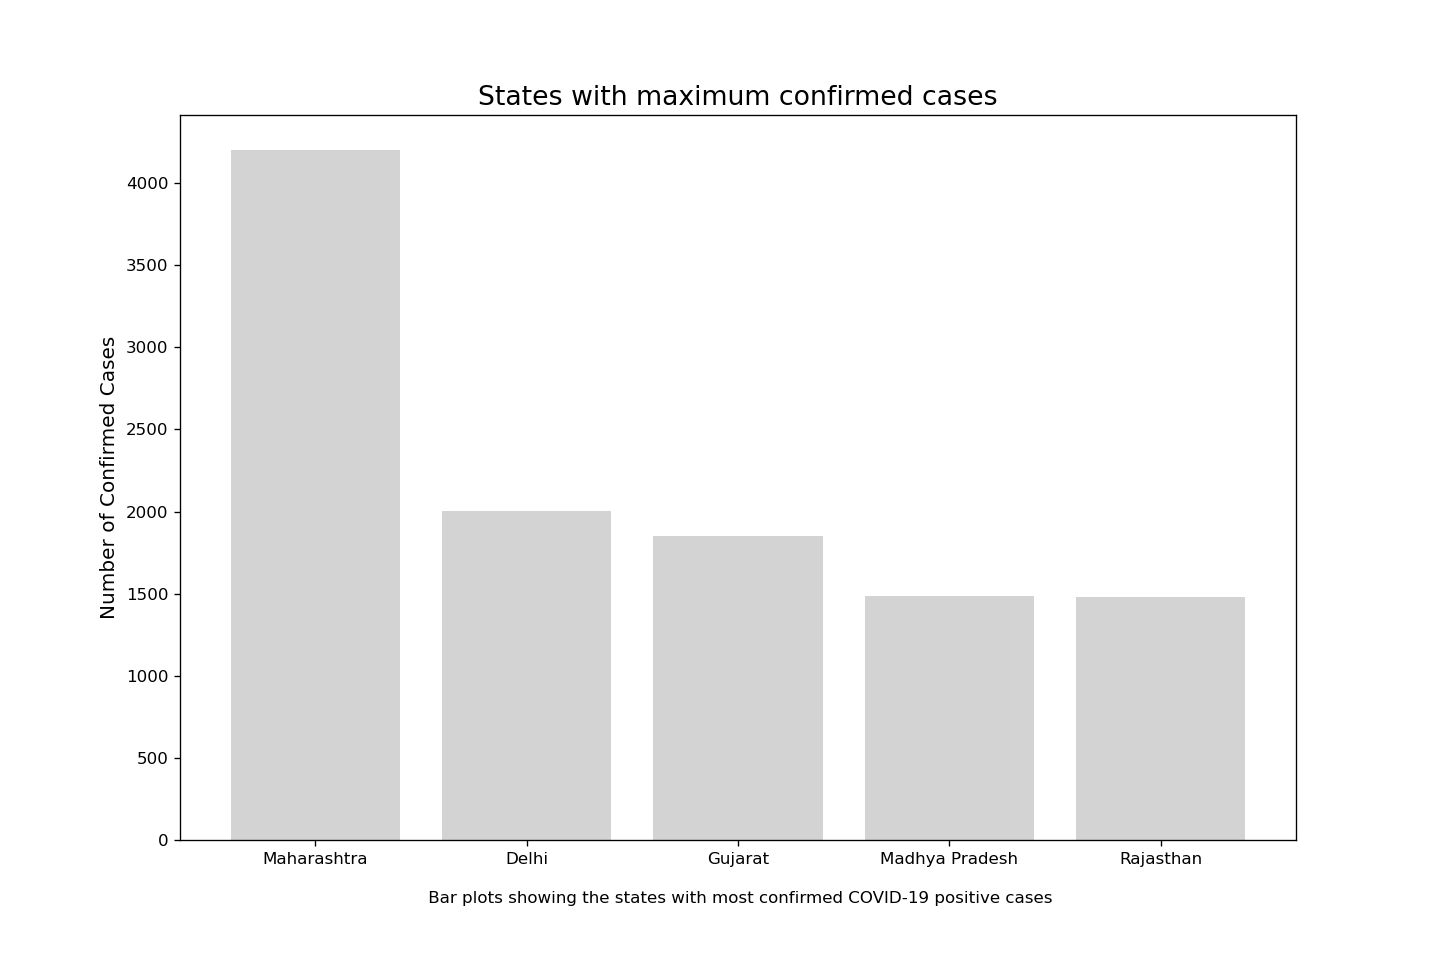

In [12]:
covid19_df_latest=covid19_df_latest.sort_values(by=['Confirmed'],ascending=False)
plt.figure(figsize=(12,8) , dpi=80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5],covid19_df_latest['Confirmed'][:5] , color='lightgrey')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.xlabel('\n Bar plots showing the states with most confirmed COVID-19 positive cases')
plt.title('States with maximum confirmed cases', size = 16)
plt.show()

In [13]:
covid19_df_latest['Deaths'].sum()

559

<IPython.core.display.Javascript object>


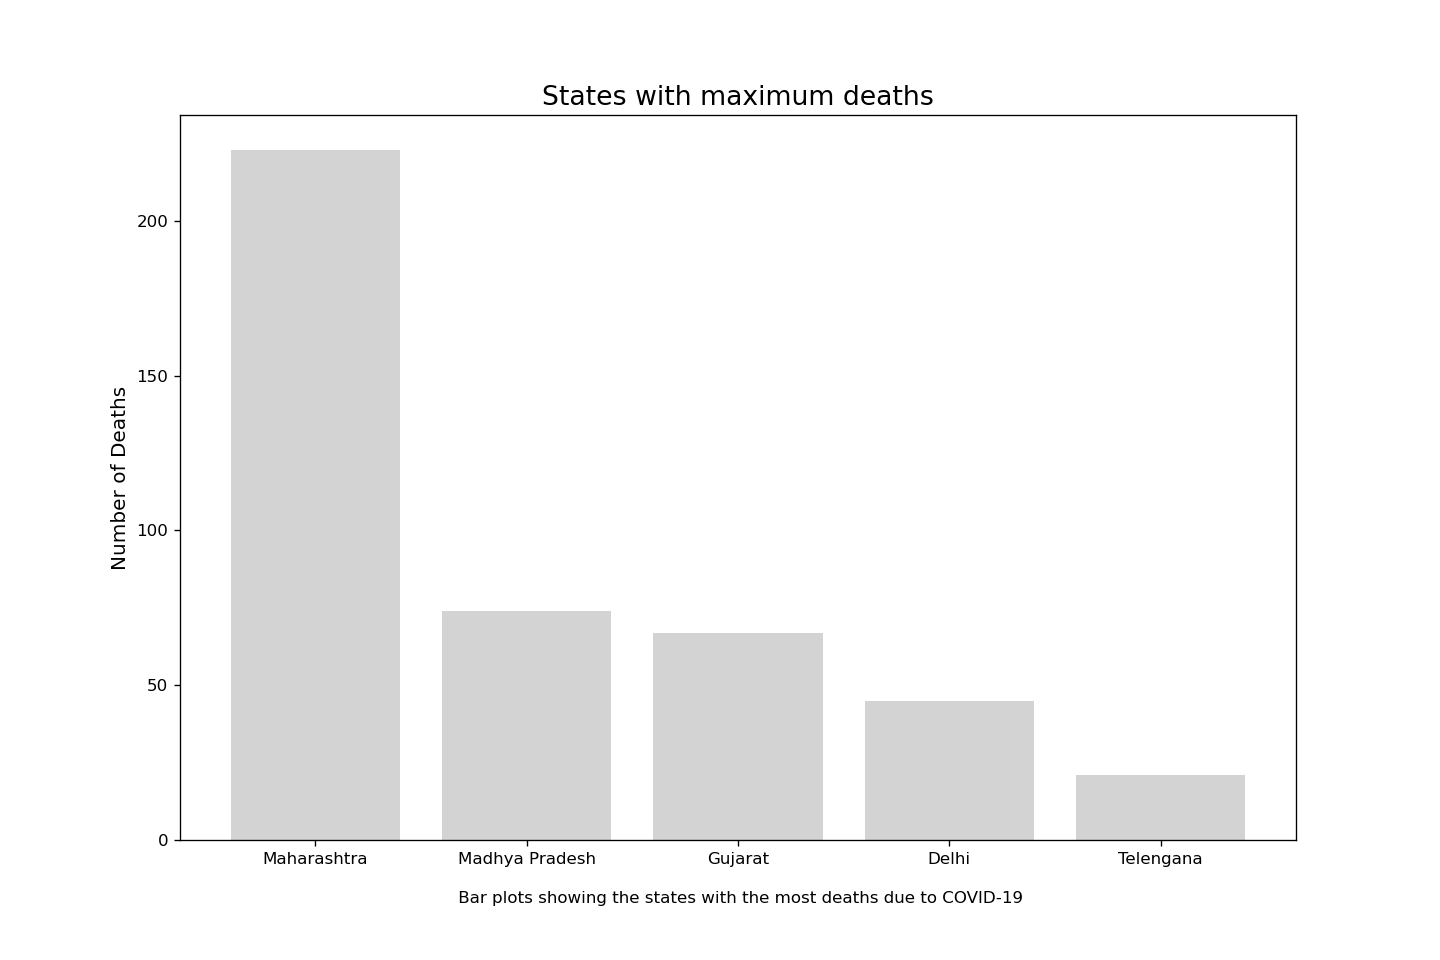

In [14]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Deaths'][:5], align='center',color='lightgrey')
plt.ylabel('Number of Deaths', size = 12)
plt.xlabel('\n Bar plots showing the states with the most deaths due to COVID-19')
plt.title('States with maximum deaths', size = 16)
plt.show()

In [15]:
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [16]:
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [17]:
covid19_df_latest = covid19_df_latest.drop(['Sno','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1)
covid19_df_latest.shape

(33, 4)

In [18]:
indian_states_df = indian_states_df[['State', 'Aadhaar assigned as of 2019']]
indian_states_df.columns = ['State/UnionTerritory', 'Population']
indian_states_df.head()


,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185


In [19]:
covid19_df_latest = pd.merge(covid19_df_latest, indian_states_df, on="State/UnionTerritory")
covid19_df_latest['Cases/10million'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Population'])*10000000
covid19_df_latest.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Population,Cases/10million
0,Maharashtra,507,223,4203,114063427,368.479197
1,Madhya Pradesh,127,74,1485,74770270,198.608351
2,Gujarat,106,67,1851,62097024,298.081918
3,Delhi,290,45,2003,21763471,920.349516
4,Telengana,190,21,873,39184011,222.794956


In [20]:
covid19_df_latest.fillna(0, inplace=True)
covid19_df_latest.sort_values(by='Cases/10million', ascending=False)

,State/UnionTerritory,Cured,Deaths,Confirmed,Population,Cases/10million
3,Delhi,290,45,2003,21763471,920.349516
22,Ladakh,14,0,18,210156,856.506595
0,Maharashtra,507,223,4203,114063427,368.479197
2,Gujarat,106,67,1851,62097024,298.081918
21,Chandigarh,13,0,26,1131522,229.779006
4,Telengana,190,21,873,39184011,222.794956
10,Rajasthan,183,14,1478,68936999,214.398657
9,Tamil Nadu,411,15,1477,72344821,204.161124
1,Madhya Pradesh,127,74,1485,74770270,198.608351
5,Andhra Pradesh,92,20,722,49145456,146.910835


<IPython.core.display.Javascript object>


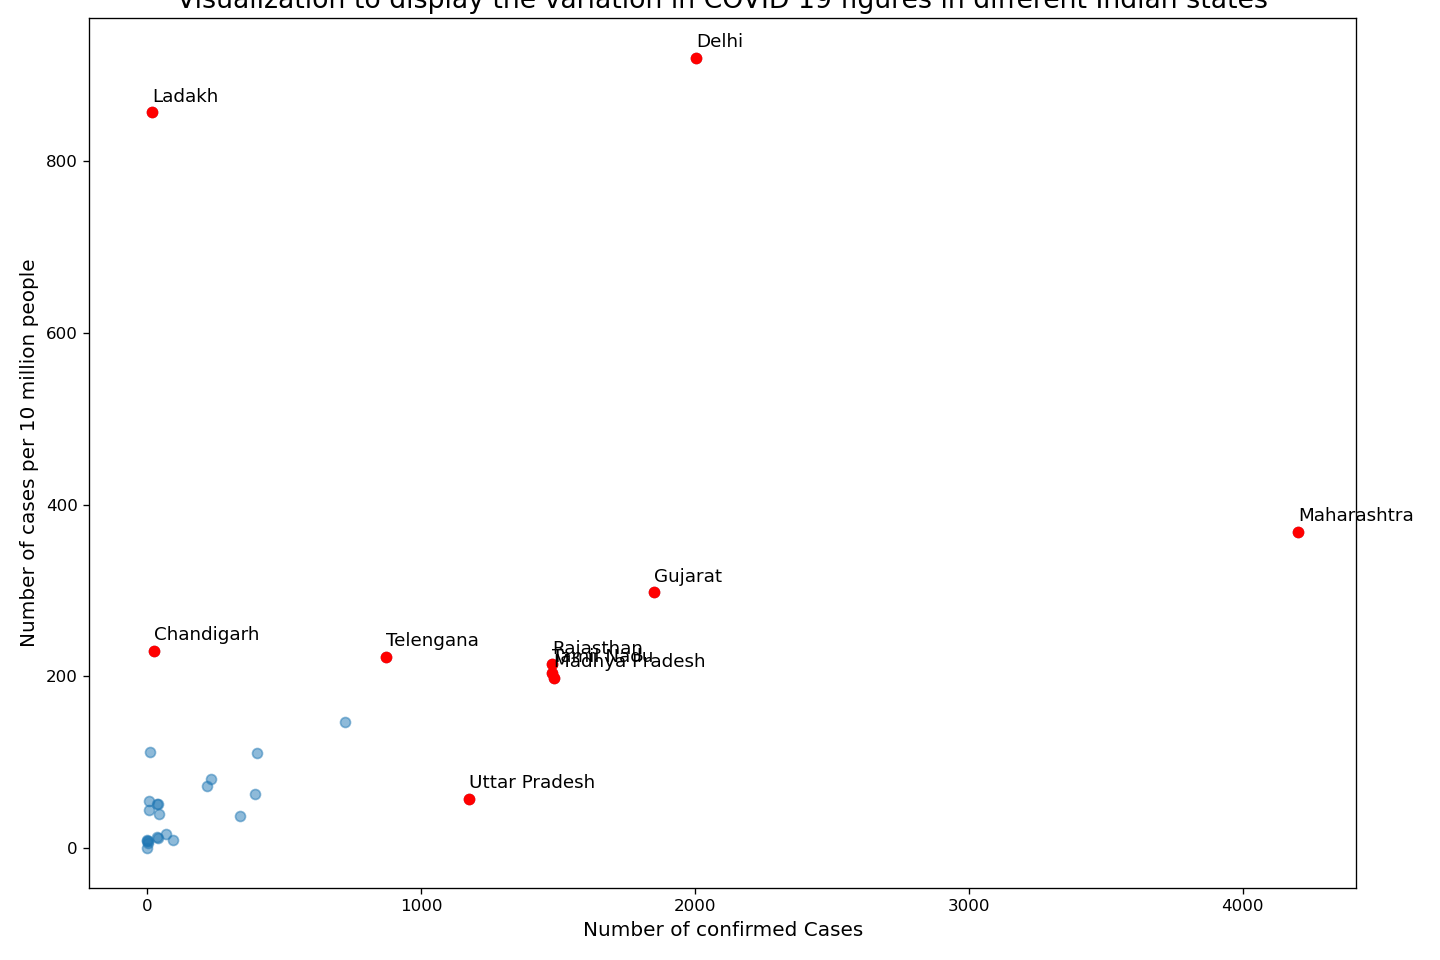

In [21]:
df = covid19_df_latest[(covid19_df_latest['Confirmed']>=1000) | (covid19_df_latest['Cases/10million']>=200)]
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(covid19_df_latest['Confirmed'], covid19_df_latest['Cases/10million'], alpha=0.5)
plt.xlabel('Number of confirmed Cases', size=12)
plt.ylabel('Number of cases per 10 million people', size=12)
plt.scatter(df['Confirmed'], df['Cases/10million'], color="red")
for i in range(df.shape[0]):
    plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i], df['Cases/10million'].tolist()[i]),
                xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0), size=11)
plt.tight_layout()    
plt.title('Visualization to display the variation in COVID 19 figures in different Indian states', size=16)
plt.show()
